# X To A Combined Forced

In [1]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory
from larval_gonad.x_to_a import CHROMS_CHR, AUTOSOMES_CHR, commonly_expressed, multi_chrom_boxplot, get_gene_sets
from larval_gonad.cell_selection import SOMA, EARLY_GERM, LATE_GERM

# Setup notebook
nbconfig = Nb.setup_notebook('2018-03-16_x2a_combined_forced', seurat_dir='../output/combined_testis_force')

last updated: 2018-03-30 
Git hash: 3e21515a1ca9937b42fb93ac97bbfdc54fa27bdc


In [2]:
norm = nbconfig.seurat.get_normalized_read_counts()
tsne = nbconfig.seurat.get_tsne()
clusters = nbconfig.seurat.get_clusters()

clus4 = clusters['res.0.4']
clus4.name = 'cluster'

clus6 = clusters['res.0.6']
clus6.name = 'cluster'

clus12 = clusters['res.1.2']
clus12.name = 'cluster'

In [4]:
norm.shape

(14312, 8066)

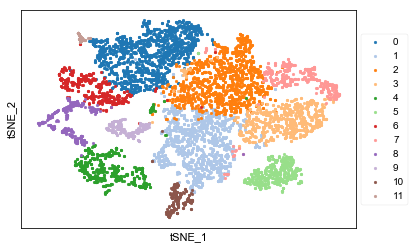

In [3]:
TSNEPlot(data=tsne.join(clusters), hue='res.0.4', palette=sns.color_palette('tab20', n_colors=13), s=8)

In [126]:
biomarkers = pd.read_csv(Path(nbconfig.seurat_dir, 'biomarkers_0.4.tsv'), sep='\t', index_col='primary_FBgn')
biomarkers = biomarkers.query('p_val_adj <= 0.001').sort_values(['cluster', 'avg_logFC'])

In [127]:
biomarkers.query(f'gene_symbol in {SOMA}')

,gene_symbol,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster
primary_FBgn,,,,,,,
FBgn0014163,fax,5.863143e-80,0.269579,0.953,0.691,8.391330e-76,1
FBgn0001257,ImpL2,1.071527e-88,0.453034,0.382,0.151,1.533570e-84,1
FBgn0014163,fax,1.883505e-95,0.434431,0.922,0.698,2.695672e-91,2
FBgn0014163,fax,1.784005e-70,0.388704,0.958,0.711,2.553267e-66,3
FBgn0001090,bnb,1.240954e-291,1.297608,0.709,0.181,1.776054e-287,3
FBgn0000464,Lar,4.907244e-157,0.269047,0.512,0.107,7.023248e-153,4
FBgn0001994,crp,2.908816e-12,0.281970,0.300,0.187,4.163098e-08,5
FBgn0000464,Lar,6.772707e-31,0.336716,0.298,0.128,9.693099e-27,5
FBgn0014163,fax,1.130706e-47,0.419874,0.974,0.720,1.618266e-43,5


In [128]:
biomarkers.query(f'gene_symbol in {EARLY_GERM}')

,gene_symbol,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster
primary_FBgn,,,,,,,
FBgn0033921,tej,0.000000e+00,0.253968,0.379,0.024,0.000000e+00,4
FBgn0010263,Rbp9,0.000000e+00,0.382946,0.485,0.036,0.000000e+00,4
FBgn0263391,hts,1.100028e-187,0.482709,0.669,0.164,1.574361e-183,4
FBgn0000158,bam,0.000000e+00,0.512517,0.512,0.020,0.000000e+00,4
FBgn0031091,Phf7,0.000000e+00,0.613691,0.679,0.083,0.000000e+00,4
FBgn0283442,vas,0.000000e+00,0.871111,0.750,0.032,0.000000e+00,4
FBgn0004581,bgcn,1.501691e-189,0.282595,0.464,0.053,2.149221e-185,8
FBgn0052364,tut,1.615969e-207,0.309074,0.571,0.075,2.312775e-203,8
FBgn0031091,Phf7,0.000000e+00,0.795698,0.809,0.097,0.000000e+00,8


In [129]:
biomarkers.query(f'gene_symbol in {LATE_GERM}')

,gene_symbol,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster
primary_FBgn,,,,,,,
FBgn0038089,d-cup,1.997137e-56,0.501471,0.251,0.111,2.858303e-52,0
FBgn0034739,CG3927,3.457390e-62,0.584412,0.433,0.259,4.948216e-58,0
FBgn0011596,fzo,1.642025e-92,0.609453,0.313,0.120,2.350067e-88,0
FBgn0037462,sunz,4.900503e-101,0.750205,0.342,0.141,7.013600e-97,0
FBgn0031367,c-cup,1.543748e-134,0.907533,0.454,0.203,2.209412e-130,0
FBgn0037460,sowi,2.278416e-209,1.121305,0.633,0.345,3.260869e-205,0
FBgn0038225,soti,0.000000e+00,1.479888,0.785,0.438,0.000000e+00,0
FBgn0037462,sunz,3.401270e-28,0.265531,0.371,0.169,4.867898e-24,6
FBgn0038089,d-cup,3.767744e-35,0.314672,0.331,0.126,5.392395e-31,6


In [61]:
header = [
    'FBgn',
    'name',
    'dbtype',
    'description',
]

In [94]:
gil = pd.read_csv('../data/external/fb_gene-anatomy/REXPOUT.txt', sep='|', skiprows=2, header=None, names=header, usecols=[0, 3]).fillna('')
gil = gil.applymap(lambda x: x.strip())

In [95]:
gil.head()

,FBgn,description
0,FBgn0050115,fat body/gonad primordium
1,FBgn0046687,trunk mesoderm
2,FBgn0032059,organism
3,FBgn0052523,photoreceptor cell
4,FBgn0086442,embryonic/larval visceral muscle


In [114]:
for g, dat in gil.groupby('description'):
    if ('sperm' not in g) & ('testis' not in g) & ('hub' not in g):
        continue
        
    FBgns = dat.FBgn.unique().tolist()
    clusters = biomarkers.query(f'primary_FBgn in {FBgns}').cluster.unique()
    gene_symbols = [nbconfig.fbgn2symbol[x] for x in biomarkers.query(f'primary_FBgn in {FBgns}').index.unique().tolist()]
    if len(clusters) > 0:
        print(g)
        print('\tCluster:', clusters)
        print('\tGenes:', gene_symbols)
        print('')

early elongation stage spermatid
	Cluster: [ 0  6 11]
	Genes: ['glob2', 'CG3330', 'glob3']

early-mid elongation-stage spermatid
	Cluster: [ 0  6 11]
	Genes: ['CG3330']

elongation stage spermatid
	Cluster: [ 0  6  8 11]
	Genes: ['bb8', 'tomboy40', 'tomboy20', 'ProtB', 'Mst77F', 'Psa', 'PpD6']

hub cell
	Cluster: [ 5 10]
	Genes: ['gbb', 'magu']

onion stage spermatid
	Cluster: [ 0  6 11]
	Genes: ['glob2', 'glob3']

polar primary spermatocyte
	Cluster: [6 8]
	Genes: ['CG11700']

pre-elongation spermatid
	Cluster: [ 0  6 11]
	Genes: ['Dhod', 'CG3330']

primary spermatocyte
	Cluster: [ 0  4  6  8 11]
	Genes: ['TrxT', 'CG3927', 'fzo', 'PpY-55A', 'Mst36Fb', 'bb8', 'tomboy40', 'glob2', 'CG8349', 'CG3330', 'tomboy20', 'uri', 'bam', 'Rcd-1r', 'tomb', 'topi', 'Mst36Fa', 'mars', 'Dgkepsilon', 'wuc', 'glob3']

primary spermatocyte cyst
	Cluster: [ 0  6  8 11]
	Genes: ['Dhod', 'twe', 'rpk']

secondary spermatocyte
	Cluster: [ 0  6 11]
	Genes: ['Dhod', 'glob2', 'mars', 'glob3']

spermatid
	Cluster:

In [85]:
biomarkers.head()

,gene_symbol,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster
primary_FBgn,,,,,,,
FBgn0264383,CR43835,7.446780e-14,0.268300,0.306,0.233,1.065783e-09,0
FBgn0037742,Rpt3R,1.658341e-10,0.287729,0.320,0.265,2.373417e-06,0
FBgn0035727,CG10063,4.022263e-23,0.290493,0.470,0.342,5.756662e-19,0
FBgn0021768,nudC,6.669213e-10,0.296665,0.528,0.547,9.544977e-06,0
FBgn0011817,nmo,6.022529e-14,0.300362,0.542,0.540,8.619443e-10,0


In [86]:
biomarkers.query('primary_FBgn in ["FBgn0264383", ]')

,gene_symbol,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster
primary_FBgn,,,,,,,
FBgn0264383,CR43835,7.446780e-14,0.268300,0.306,0.233,1.065783e-09,0
FBgn0264383,CR43835,1.360246e-163,1.197369,0.722,0.220,1.946784e-159,6
FBgn0264383,CR43835,3.865724e-192,1.154425,0.861,0.218,5.532624e-188,8
FBgn0264383,CR43835,4.161104e-29,0.292606,1.000,0.242,5.955372e-25,11


# House Keeping

In [118]:
gene_sets = get_gene_sets()

In [120]:
expressed = commonly_expressed(norm)

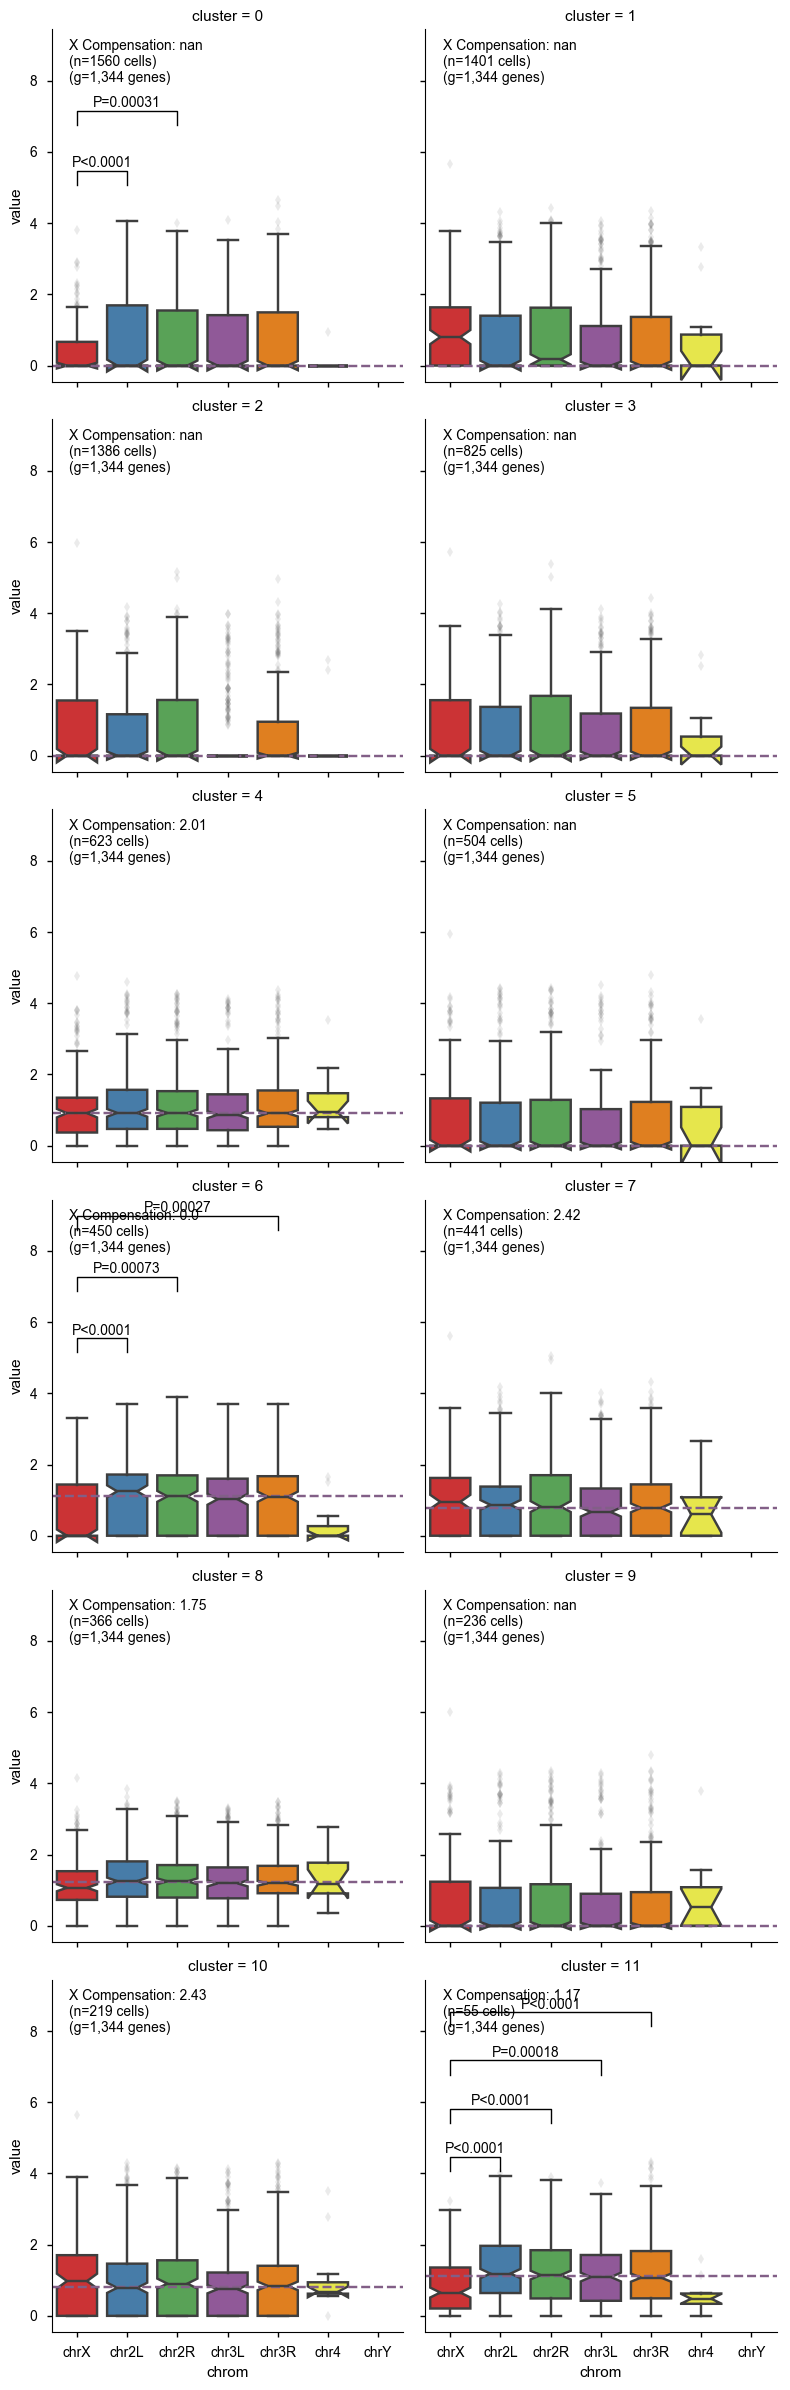

In [125]:
data = norm.loc[expressed, :].T.join(clus4)
dat = data.groupby('cluster').median().T.reset_index()\
    .melt(id_vars='index')\
    .merge(nbconfig.fbgn2chrom, left_on='index', right_index=True)\
    .set_index('index')

def _plot(dat):
    num_cells = data.groupby('cluster').count().iloc[:, 0].to_dict()
    g = sns.FacetGrid(dat, col='cluster', col_wrap=2, size=4)
    g.map_dataframe(multi_chrom_boxplot, 'chrom', 'value', num_cells=num_cells, palette=nbconfig.color_chrom, 
                    notch=True, flierprops=nbconfig.fliersprops)

_plot(dat)

In [136]:
data = norm.loc[expressed, :].T.join(clus4)

In [185]:
late = data.loc[data.cluster.isin([6, 11])].median()
late.name = 'late'

early = data.loc[data.cluster.isin([4, 9])].median()
early.name = 'early'

soma = data.loc[data.cluster.isin([1, 7, 10])].median()
soma.name = 'soma'

In [182]:
late = data.loc[data.cluster.isin([6, 11])].sum()
late.name = 'late'

early = data.loc[data.cluster.isin([4, 9])].sum()
early.name = 'early'

soma = data.loc[data.cluster.isin([1, 7, 10])].sum()
soma.name = 'soma'

Text(0.5,1,'Late Germ Cell')

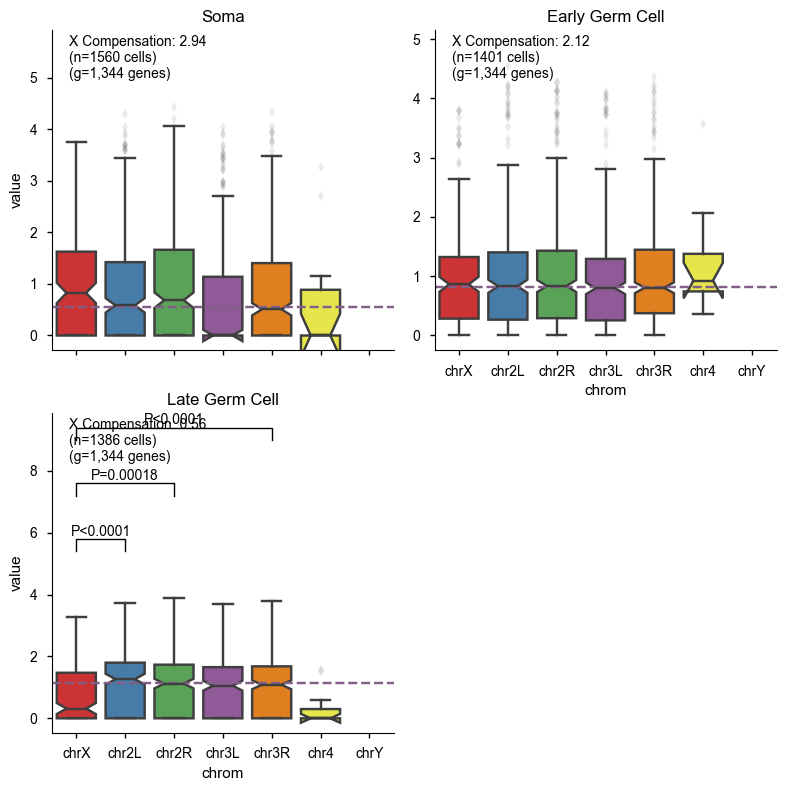

In [186]:
dat = pd.concat([late, early, soma], axis=1).reset_index().melt(id_vars='index').merge(nbconfig.fbgn2chrom, left_on='index', right_index=True).set_index('index')
dat.rename({'variable': 'cluster'}, inplace=True, axis=1)
dat.cluster = dat.cluster.replace({'soma': 0, 'early': 1, 'late': 2})

def _plot(dat):
    num_cells = data.groupby('cluster').count().iloc[:, 0].to_dict()
    g = sns.FacetGrid(dat, col='cluster', col_wrap=2, size=4, sharey=False)
    g.map_dataframe(multi_chrom_boxplot, 'chrom', 'value', num_cells=num_cells, palette=nbconfig.color_chrom, 
                    notch=True, flierprops=nbconfig.fliersprops)

_plot(dat)
fig = plt.gcf()

ax = fig.axes[0]
ax.set_title('Soma')

ax = fig.axes[1]
ax.set_title('Early Germ Cell')

ax = fig.axes[2]
ax.set_title('Late Germ Cell')

In [130]:
Ydata = norm.join(nbconfig.fbgn2chrom).query('chrom == "chrY"').drop('chrom', axis=1)
Ydata = Ydata.T.loc[clus4.sort_values().index]

In [131]:
Ydata.columns = Ydata.columns.map(lambda x: nbconfig.fbgn2symbol[x])

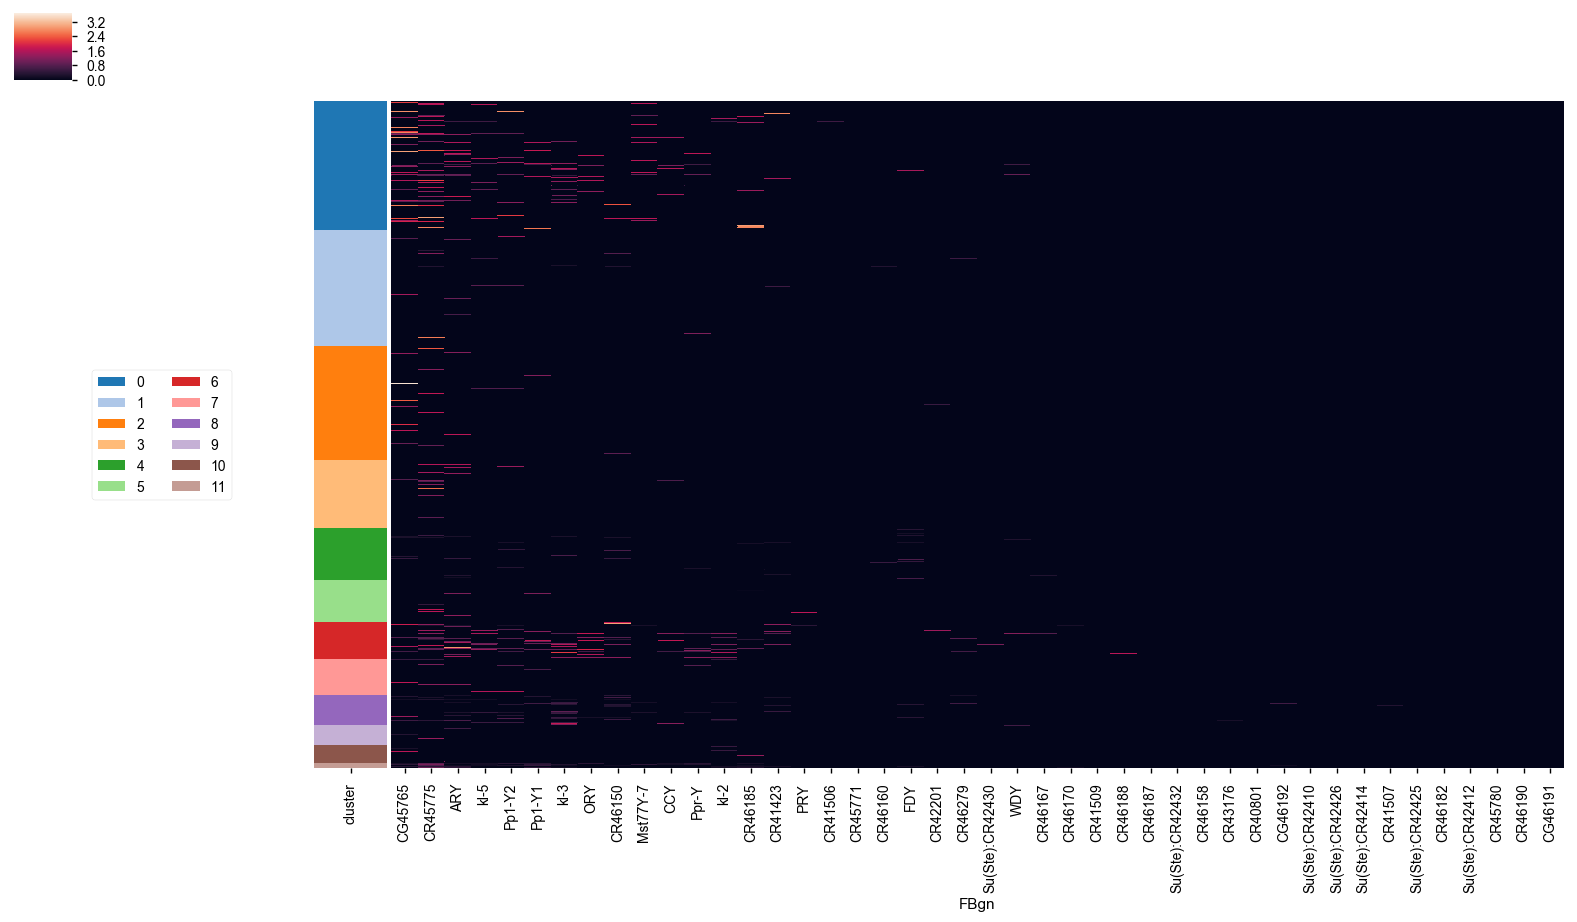

In [135]:
levels = sorted(clus4.unique())
colors = sns.color_palette('tab20', n_colors=len(levels))
mapper = dict(zip(levels, colors))
cmap = clus4.sort_values().map(mapper)

g = sns.clustermap(Ydata, row_cluster=False, col_cluster=True, yticklabels=False, row_colors=cmap, figsize=(20, 10))
g.ax_col_dendrogram.set_visible(False)

for label in levels:
    g.ax_row_dendrogram.bar(0, 0, color=mapper[label],
                            label=label, linewidth=0)
g.ax_row_dendrogram.legend(loc="center", ncol=2)

In [15]:
from larval_gonad.x_to_a import estimate_dcc, clean_pvalue

In [16]:
from scipy.stats import mannwhitneyu

In [37]:
def boxplot(data, expressed, mask, chrom, ax, name):
    _data = data.loc[expressed, mask]
    _data['median'] = _data.median(axis=1)
    _data = _data.join(chrom, how='inner')
    med_x, med_major, prop_dcc = estimate_dcc('chrom', 'median', _data)

    _data['chrom'] = _data['chrom'].map(lambda x: x.replace('chr', ''))
    
    ORDER = ['X', '2L', '2R', '3L', '3R', '4']
    sns.boxplot(_data['chrom'], _data['median'], order=ORDER, notch=True, boxprops={"facecolor": 'w'}, ax=ax, flierprops={'alpha': .6})
    ax.axhline(med_major, ls=':', lw=2, color=nbconfig.color_c1)
    ax.set_title(name)
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('Median Normalized Expression')
    
    # Clean up the pvalue for plotting
    pvalues = {}
    iqr = 0
    chromX = _data[_data.chrom == 'X']
    for g, df in _data.groupby('chrom'):
        _iqr = sns.utils.iqr(df['median'])
        if _iqr > iqr:
            iqr = _iqr
        if g == 'X':
            continue
        if g == 'M':
            continue
        _, pval = mannwhitneyu(chromX['median'], df['median'], alternative='two-sided')
        if pval <= 0.001:
            pvalues[g] = '***'

    multiplier = .35
    xloc = ORDER.index('X')
    for k, v in pvalues.items():
        oloc = ORDER.index(k)
        pval = v
        y, h, col = iqr + iqr * multiplier, .1, 'k'
        plt.plot([xloc, xloc, oloc, oloc], [y, y+h, y+h, y], lw=1, c=col)
        plt.text((xloc+oloc)*.5, y+h+.01, f"{pval}", ha='center',
                 va='bottom', color=col)
        multiplier += .2

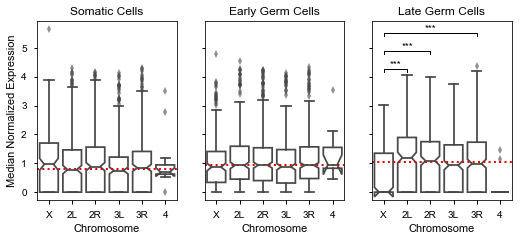

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8.5, 3.3), sharex=True, sharey=True)
chrom = nbconfig.fbgn2chrom
boxplot(norm, expressed, soma, chrom, ax1, 'Somatic Cells')
boxplot(norm, expressed, early, chrom, ax2, 'Early Germ Cells')
boxplot(norm, expressed, late, chrom, ax3, 'Late Germ Cells')
ax2.set_ylabel('')
ax3.set_ylabel('')
plt.savefig('../output/figures/2018-03-16_x2a_combined_forced_simple_boxplot.png', dpi=300)
